# Real Micro Crystals -  Data Engineering & Exploration 1

Michael Janus, June 2018

Use the functions on a real (small) data set.

For explanation and how to usage functions, see the notebook **imgutils_test_and_explain.ipynb**

## 1. Import the used modules, including the one with test functions:

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib

import imgutils
import imgutils_test as tst

In [80]:
# Re-run this cell if you altered imgutils or imgutils_test
import importlib
importlib.reload(imgutils)
importlib.reload(tst)

<module 'imgutils_test' from 'C:\\JADS\\SW\\Grad Proj\\realxtals1\\sources\\imgutils_test.py'>

## 1. Get image files

In [6]:
df_imgfiles = imgutils.scanimgdir('../data/Crystals_Apr_12/Tileset7', '.tif')
print(df_imgfiles)

                                            filename
0  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...
1  ..\data\Crystals_Apr_12\Tileset7\Tile_001-002-...
2  ..\data\Crystals_Apr_12\Tileset7\Tile_001-003-...
3  ..\data\Crystals_Apr_12\Tileset7\Tile_002-001-...
4  ..\data\Crystals_Apr_12\Tileset7\Tile_002-002-...
5  ..\data\Crystals_Apr_12\Tileset7\Tile_002-003-...


## 2. Get Image Slice Statistics
This set contains 6 images. Let's slice those up in 4 by 4; this will give total of 6 x 4 x 4 = 96 slices.
And also apply the statistics on each slice.

In [14]:
statfuncs = [imgutils.img_min, imgutils.img_max, imgutils.img_range, imgutils.img_mean, imgutils.img_std, imgutils.img_median]
df = imgutils.slicestats(list(df_imgfiles['filename']), 4, 4, statfuncs)
print("records: ", df.shape[0])
df.head()

records:  96


,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_range,img_mean,img_std,img_median
0,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,0,4,4,img0_0-0,5419.0,12927.0,7508.0,8955.557637,489.754848,8960.0
1,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,1,4,4,img0_0-1,5248.0,12854.0,7606.0,8883.137305,501.739963,8893.0
2,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,2,4,4,img0_0-2,6084.0,10737.0,4653.0,8786.996070,327.512136,8786.0
3,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,3,4,4,img0_0-3,7105.0,12208.0,5103.0,8679.430512,273.673569,8679.0
4,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,1,0,4,4,img0_1-0,4534.0,10926.0,6392.0,8982.867158,380.410977,8980.0


**Normalize** the statistics using 'standarization'

In [15]:
stat_names = imgutils.stat_names(statfuncs)
print(stat_names)

['img_min', 'img_max', 'img_range', 'img_mean', 'img_std', 'img_median']


In [16]:
imgutils.normalize(df, stat_names)
df.head()

,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_range,img_mean,img_std,img_median,|img_min|,|img_max|,|img_range|,|img_mean|,|img_std|,|img_median|
0,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,0,4,4,img0_0-0,5419.0,12927.0,7508.0,8955.557637,489.754848,8960.0,0.272467,0.099593,-0.110160,0.615795,-0.100998,0.524018
1,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,1,4,4,img0_0-1,5248.0,12854.0,7606.0,8883.137305,501.739963,8893.0,0.208221,0.071800,-0.086875,0.289248,-0.079451,0.180861
2,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,2,4,4,img0_0-2,6084.0,10737.0,4653.0,8786.996070,327.512136,8786.0,0.522312,-0.734208,-0.788528,-0.144258,-0.392677,-0.367165
3,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,3,4,4,img0_0-3,7105.0,12208.0,5103.0,8679.430512,273.673569,8679.0,0.905910,-0.174153,-0.681605,-0.629277,-0.489467,-0.915190
4,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,1,0,4,4,img0_1-0,4534.0,10926.0,6392.0,8982.867158,380.410977,8980.0,-0.060035,-0.662250,-0.375329,0.738935,-0.297575,0.626452


In [22]:
stat_normnames = imgutils.normalized_names(stat_names)
print(stat_normnames)

['|img_min|', '|img_max|', '|img_range|', '|img_mean|', '|img_std|', '|img_median|']


## 3. Check some combinations for patterns
(using the seaborn pairplot)

In [17]:
import seaborn as sb

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


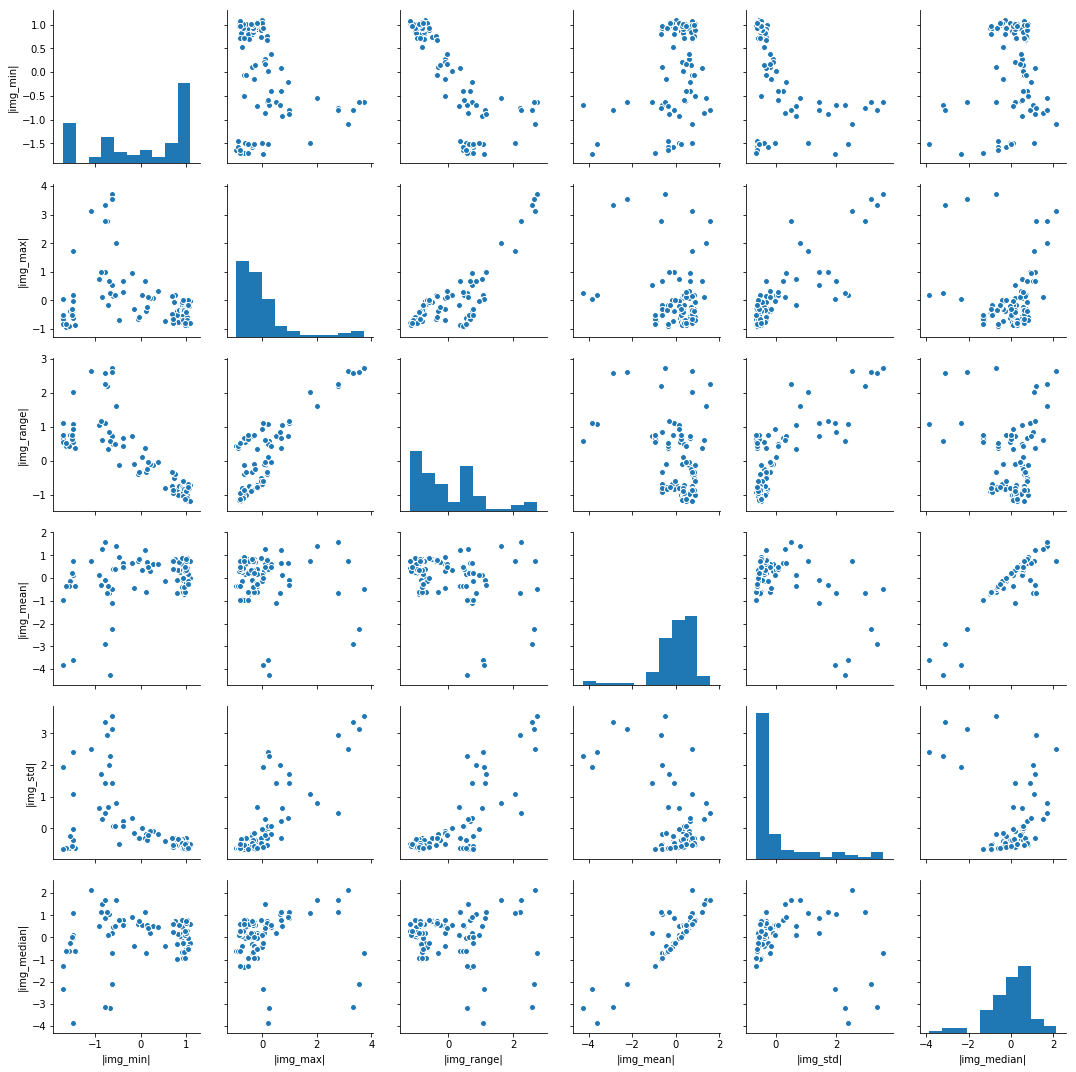

In [23]:
sb.pairplot(df, vars=stat_normnames)

## 4. Inspect interactively
Let's inspect some combinations that have 'signs of clustering' in the interactive graph

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


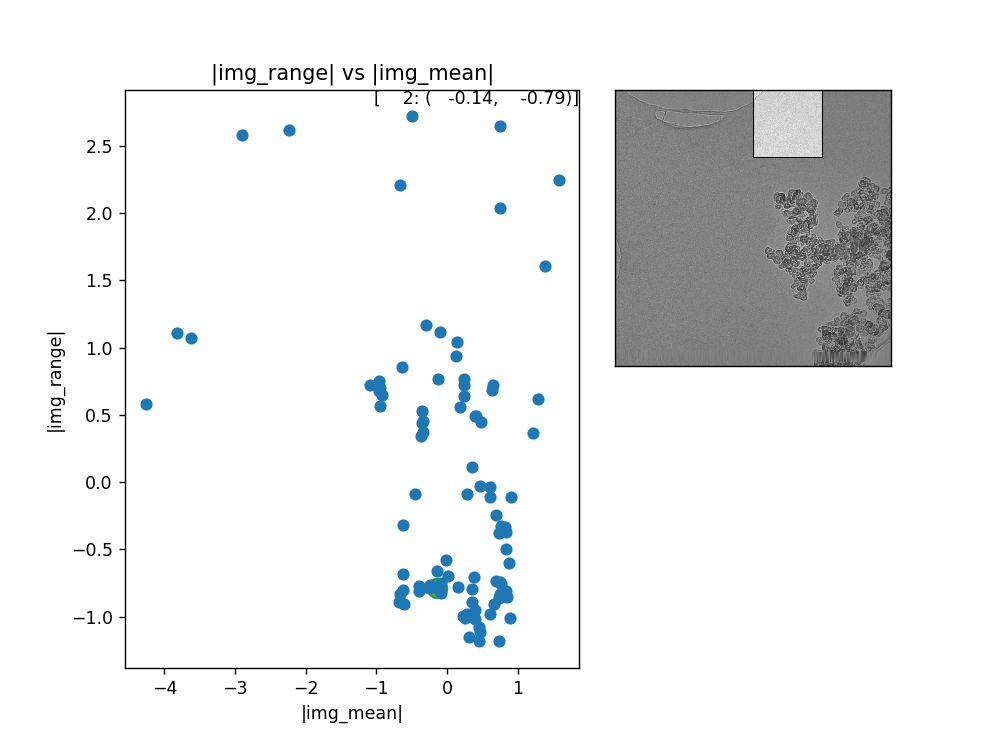

In [26]:
imgutils.plotwithimg(df, '|img_mean|', '|img_range|', imgutils.highlightimgslice, True)

Looks likt the sort-of cluster in lower right are points without a crystal

<IPython.core.display.Javascript object>


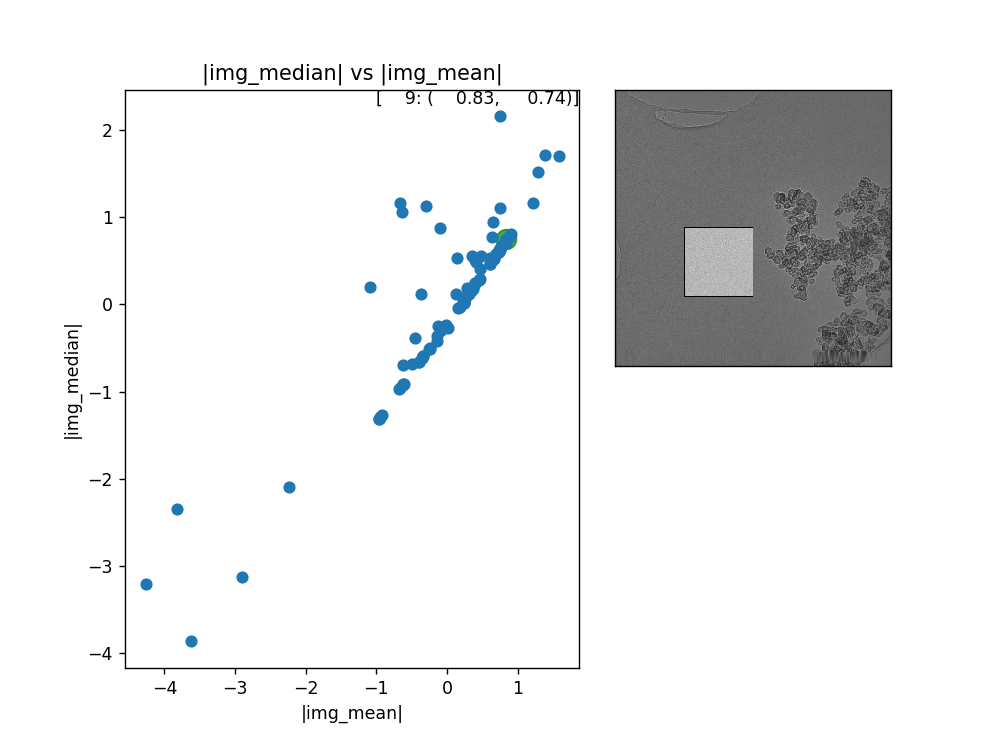

In [28]:
imgutils.plotwithimg(df, '|img_mean|', '|img_median|', imgutils.highlightimgslice, True)

The separation is not representative, the group at top-left contains both with and without micro crystals

<IPython.core.display.Javascript object>


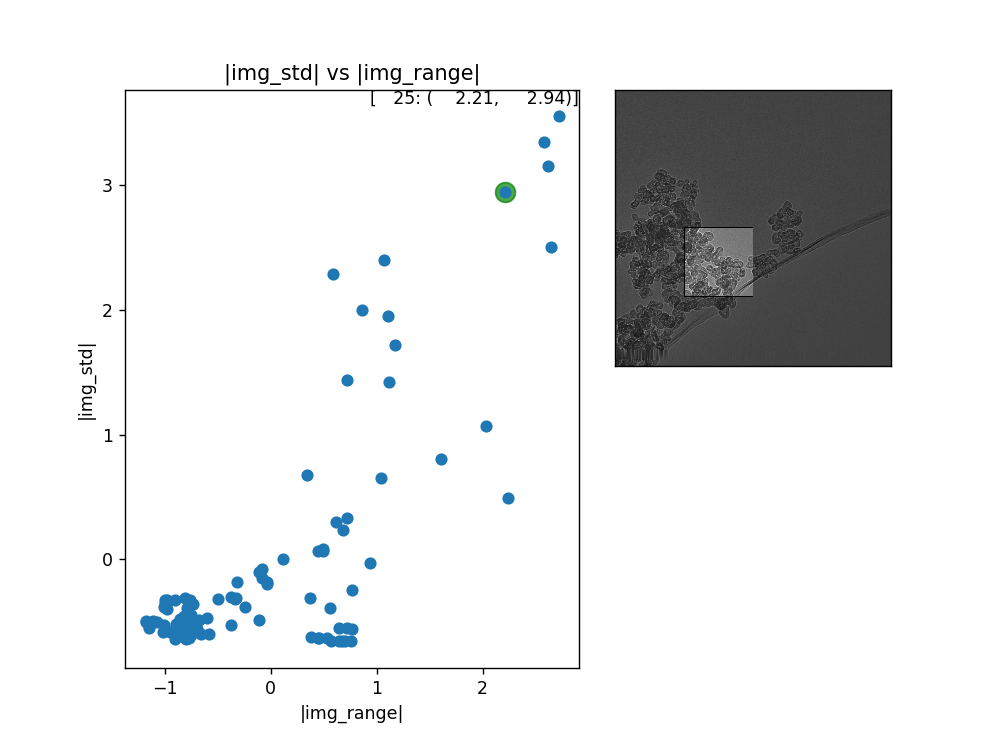

In [29]:
imgutils.plotwithimg(df, '|img_range|', '|img_std|', imgutils.highlightimgslice, True)

This looks better, bottom left are empty regions, top-left have crystals. 

## 5. Heatmaps

Let's do an attempt to create a score for a heatmap. Looks like |img_std| is most infromative

In [74]:
imgname = df_imgfiles.iloc[3]['filename']
print(imgname)

..\data\Crystals_Apr_12\Tileset7\Tile_002-001-000_0-000.tif


In [82]:
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')

<IPython.core.display.Javascript object>


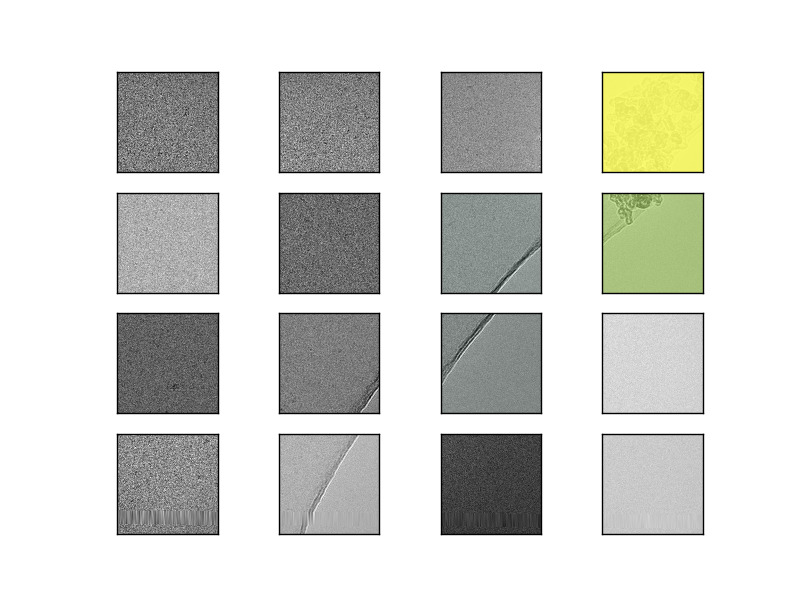

In [83]:
imgutils.showheatmap(imgs, heats)

Yes, looks great!. Let's check for some other images as well

<IPython.core.display.Javascript object>


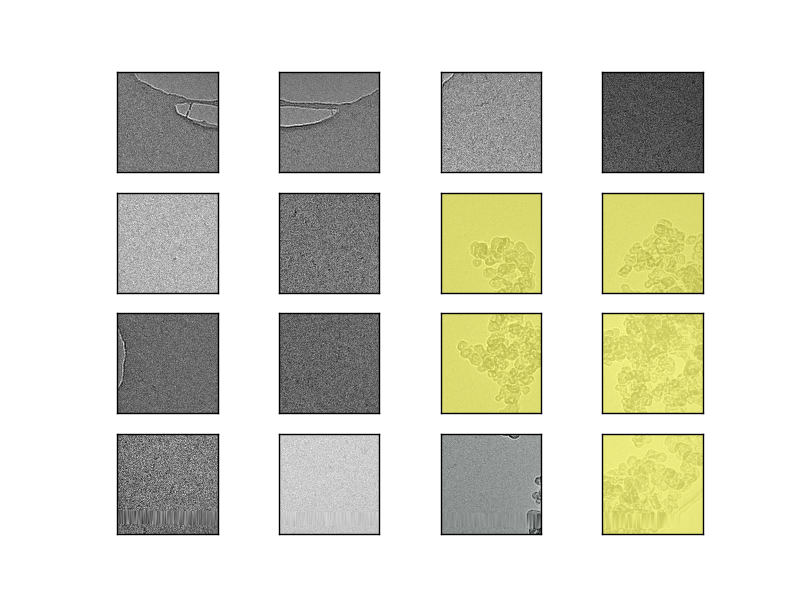

In [90]:
imgname = df_imgfiles.iloc[0]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)

<IPython.core.display.Javascript object>


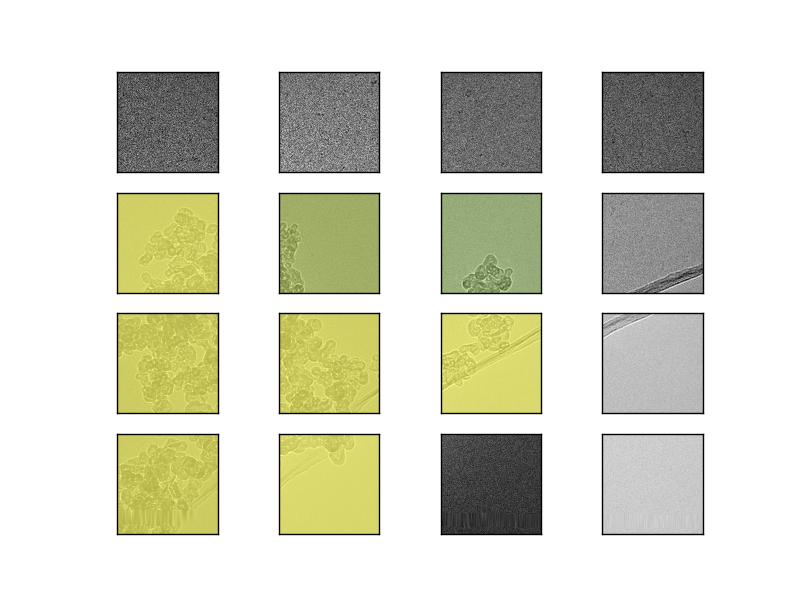

In [91]:
imgname = df_imgfiles.iloc[1]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)

<IPython.core.display.Javascript object>


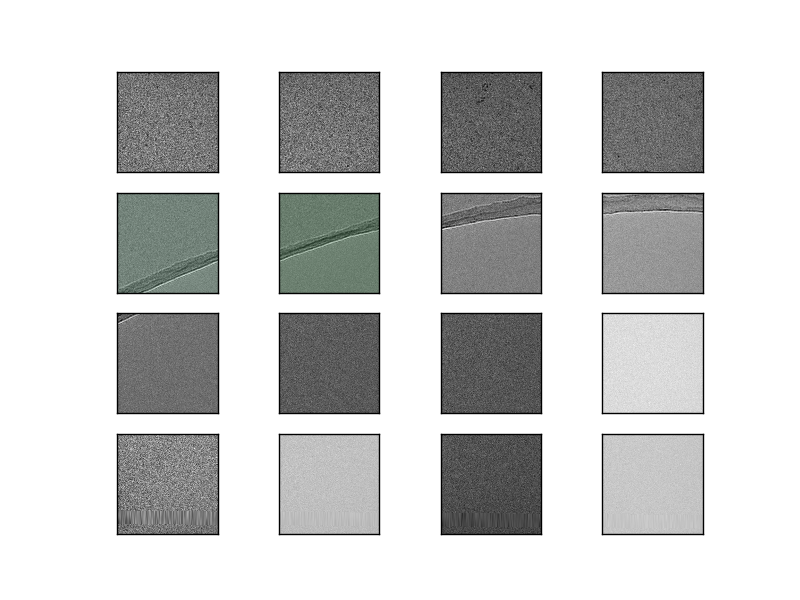

In [92]:
imgname = df_imgfiles.iloc[2]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)

<IPython.core.display.Javascript object>


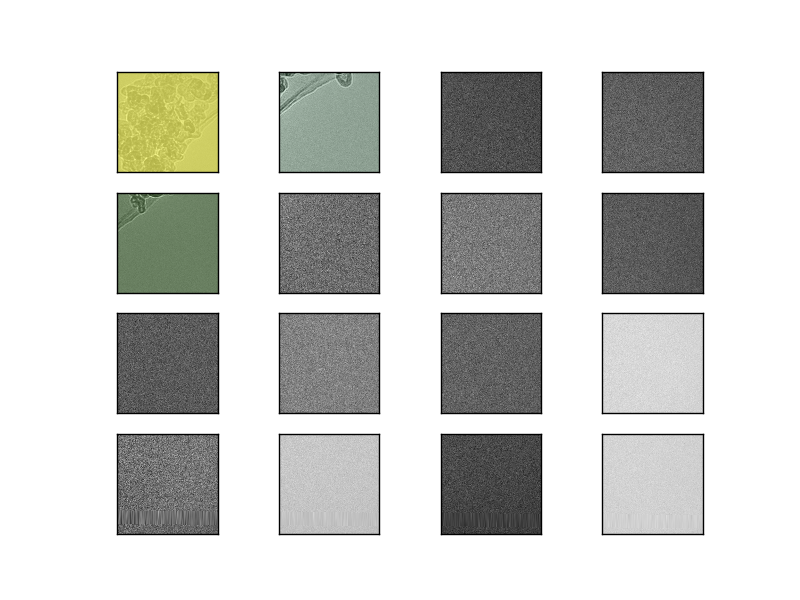

In [93]:
imgname = df_imgfiles.iloc[4]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)

<IPython.core.display.Javascript object>


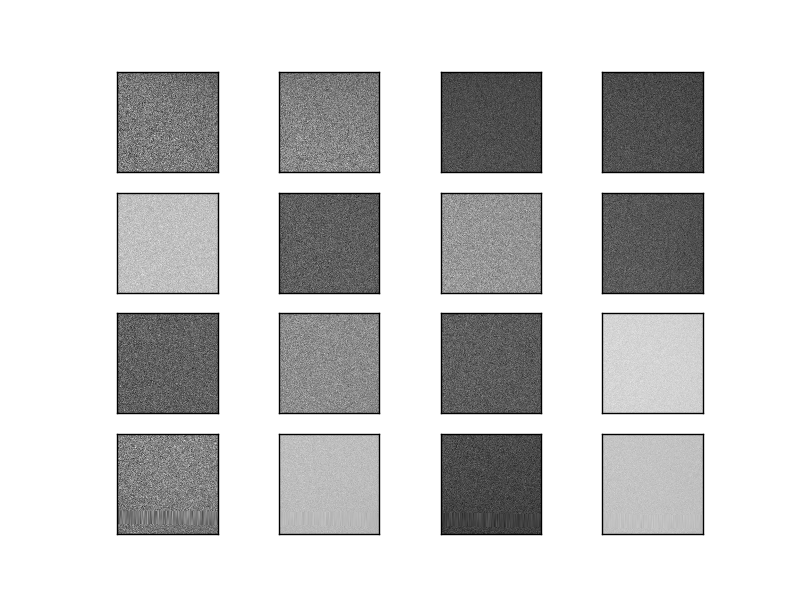

In [94]:
imgname = df_imgfiles.iloc[5]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)

## 6. Conclusions & Remarks
- The visualization and heatmap concept looks nice. 
- Did not use real clustering, but from data exploration just used normalized standard deviation as indicator
- For larger or different sets (with outliers), I guess a combination of statistics is needed (which was the idea in the first place and let ML figure out what)


## 7. Next steps
- Export this data set and label it based on std-dev (e.g. 3 cats: none, some, full) 
- Export this data set for unsupervised learning
- Repeat on bigger and more versatile set



Michael Janus, 15 June 2018